In [2]:
import numpy as np
import cv2
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

In [7]:
# Function to apply rotation and scaling transformations to images
def augment_data(images):
    augmented_images = []
    for img in images:
        # Rotate the image by a random angle between -15 and 15 degrees
        angle = np.random.randint(-15, 15)
        rotation_matrix = cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
        
        # Scale the image by a random factor between 0.9 and 1.1
        scale_factor = np.random.uniform(0.9, 1.1)
        scaled_img = cv2.resize(rotated_img, (img.shape[1], img.shape[0]))  # Resize to original shape
        augmented_images.append(scaled_img)
    
    return np.array(augmented_images)


In [13]:
def augment_data(images, rotation_range=(-15, 15), scale_range=(0.9, 1.1), flip_probability=0.5):
    augmented_images = []
    for img in images:
        # Random rotation
        angle = np.random.randint(rotation_range[0], rotation_range[1])
        rotation_matrix = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

        # Random scaling
        scale_factor = np.random.uniform(scale_range[0], scale_range[1])
        scaled_img = cv2.resize(rotated_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

        # Random horizontal flip
        if np.random.rand() < flip_probability:
            scaled_img = cv2.flip(scaled_img, 1)

        augmented_images.append(scaled_img)

    # Ensure all images have the same shape
    max_height = max(img.shape[0] for img in augmented_images)
    max_width = max(img.shape[1] for img in augmented_images)
    for i in range(len(augmented_images)):
        augmented_images[i] = cv2.resize(augmented_images[i], (max_width, max_height))

    return np.array(augmented_images)


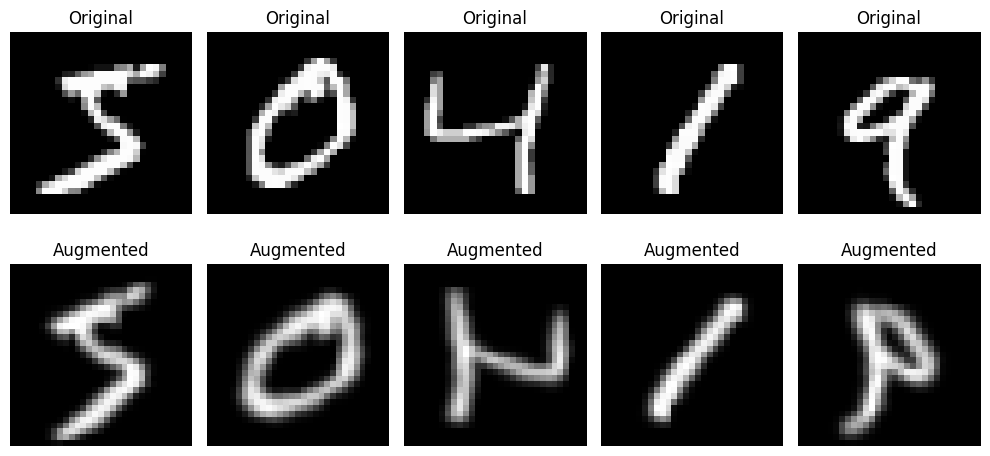

In [14]:
# Augment the training images
augmented_X_train = augment_data(X_train)

# Visualize original and augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_X_train[i], cmap='gray')
    plt.title('Augmented')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
def augment_data(images, rotation_range=(-15, 15), scale_range=(0.9, 1.1), flip_probability=0.5):
  augmented_images = []
  for img in images:
    # Random rotation
    angle = np.random.randint(rotation_range[0], rotation_range[1])
    rotation_matrix = cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
    
    # Random scaling
    scale_factor = np.random.uniform(scale_range[0], scale_range[1])
    scaled_img = cv2.resize(rotated_img, (int(img.shape[1]*scale_factor), int(img.shape[0]*scale_factor)))
    
    # Random horizontal flip
    if np.random.rand() < flip_probability:
      scaled_img = cv2.flip(scaled_img, 1)
    
    augmented_images.append(scaled_img)
  return np.array(augmented_images)
